In [1]:
!pip install plotly-express

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=ac9dac20355ce57e9e42394e0a2b9eec709eaa8b78d62a2c35f61b91f7893362
  Stored in directory: c:\users\mahmo\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [2]:
import plotly.express as px
import plotly.graph_objects as go

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('salaries_clean')

In [5]:
df.sample()

,job_title,rating,size,type_of_ownership,industry,sector,revenue,min_salary,max_salary,avg_salary,city,state,company_age,job_title_simp,seniority
497,Data Analyst,4.4,51 to 200 Employees,Company - Private,"Gift, Novelty & Souvenir Stores",Retail,$10 to $25 million (USD),47,84,65.5,Brooklyn,NY,21.0,data analyst,NaN


In [11]:
# px.scatter(df, x="rating", y="avg_salary")

In [12]:
# px.box(df, y="avg_salary")

In [9]:
px.histogram(df, x="avg_salary")

Average salary follows a normal distribution

In [14]:
px.histogram(df, x="company_age")

Makes sense that the majority of companies are less than 100 years old

In [15]:
px.histogram(df, x="rating")

Rating also follows a normal distribution

In [19]:
px.box(df, y=['avg_salary', 'company_age'])

In [20]:
px.box(df, y=['rating'])

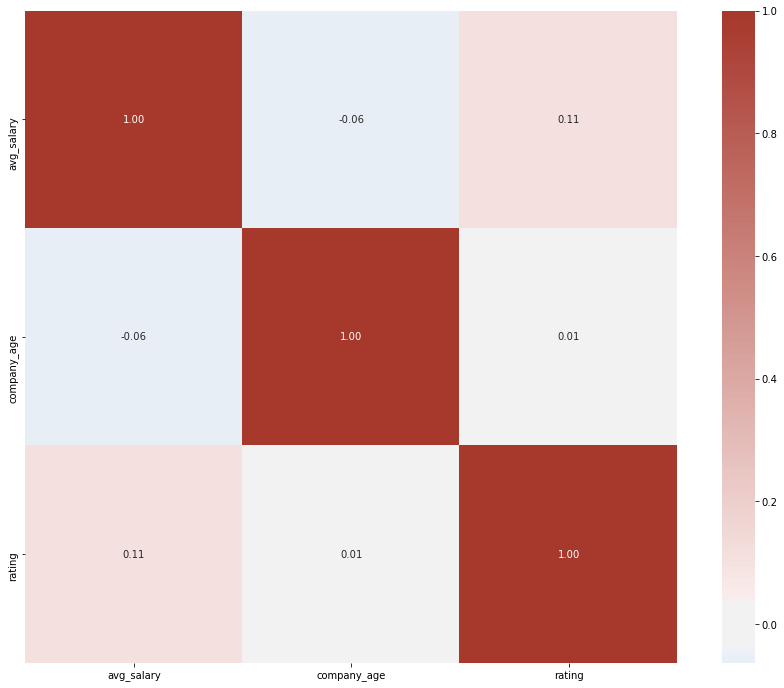

In [22]:
matrix = df[['avg_salary', 'company_age', 'rating']].corr()

plt.figure(figsize=(16,12))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)

All the correlations, whether postivie or negative, look weak here. 

In [16]:
df.dtypes

job_title             object
rating               float64
size                  object
type_of_ownership     object
industry              object
sector                object
revenue               object
min_salary             int64
max_salary             int64
avg_salary           float64
city                  object
state                 object
company_age          float64
job_title_simp        object
seniority             object
dtype: object

In [23]:
df.columns

Index(['job_title', 'rating', 'size', 'type_of_ownership', 'industry',
       'sector', 'revenue', 'min_salary', 'max_salary', 'avg_salary', 'city',
       'state', 'company_age', 'job_title_simp', 'seniority'],
      dtype='object')

In [24]:
df_cat = df[['job_title_simp', 'seniority', 'size', 'type_of_ownership', 'industry',
       'sector', 'revenue','city',
       'state']]

In [25]:
df_cat

,job_title_simp,seniority,size,type_of_ownership,industry,sector,revenue,city,state
0,data analyst,NaN,1001 to 5000 Employees,Company - Public,Banks & Credit Unions,Finance,$10+ billion (USD),Miami Lakes,FL
1,data analyst,senior,1001 to 5000 Employees,Nonprofit Organization,Lending,Finance,$500 million to $1 billion (USD),Harrisburg,PA
2,data analyst,NaN,5001 to 10000 Employees,Company - Private,Industrial Manufacturing,Manufacturing,NaN,Pleasant Prairie,WI
3,data analyst,NaN,1001 to 5000 Employees,Company - Private,Logistics & Supply Chain,Transportation & Logistics,NaN,Rancho Cucamonga,CA
4,data analyst,NaN,1001 to 5000 Employees,Company - Private,Insurance Carriers,Insurance,$1 to $2 billion (USD),Columbia,MO
...,...,...,...,...,...,...,...,...,...
511,data analyst,senior,10000+ Employees,Company - Private,Insurance Carriers,Insurance,$10+ billion (USD),Boston,MA
512,data analyst,NaN,NaN,NaN,NaN,NaN,NaN,Lakewood,OH
513,data analyst,NaN,1 to 50 Employees,Company - Private,Colleges & Universities,Education,NaN,Lisle,IL
514,data analyst,NaN,NaN,NaN,NaN,NaN,NaN,Ames,IA


In [38]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print(f"{i}")
    print(f"total: {df_cat[i].count()}")
    px.bar(x=cat_num, y=cat_num.index).show()


job_title_simp
total: 512


seniority
total: 80


size
total: 492


type_of_ownership
total: 496


industry
total: 466


sector
total: 466


revenue
total: 371


city
total: 516


state
total: 506


In [34]:
df_cat.job_title_simp.value_counts()

data analyst    512
Name: job_title_simp, dtype: int64